In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv
%matplotlib inline

In [2]:
path=r"C:\Users\vidya\Downloads\Vehikal classification\Dataset"

In [3]:
dis=os.listdir(path)
dis

['Bus', 'Car', 'motorcycle', 'Truck']

In [4]:
dis.index("Car")

1

In [5]:
Data=[]
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(80,80))
        T=dis.index(i)
        Data.append([C,T])

In [6]:
i=cv.imread(r"C:\Users\vidya\Downloads\Vehikal classification\Dataset\motorcycle\Image_76.jpeg")

In [7]:
i.shape

(960, 1280, 3)

In [8]:
Data[6]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 97, 105, 108],
         [ 86,  96,  96],
         [ 65,  73,  72]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 93, 102, 102],
         [ 69,  74,  75],
         [ 48,  53,  54]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 88,  96,  95],
         [ 64,  74,  74],
         [ 74,  82,  85]],
 
        ...,
 
        [[177, 163, 164],
         [162, 149, 147],
         [193, 193, 200],
         ...,
         [139, 148, 165],
         [139, 149, 166],
         [133, 143, 160]],
 
        [[192, 195, 200],
         [191, 191, 203],
         [201, 200, 208],
         ...,
         [138, 145, 162],
         [143, 150, 159],
         [139, 149, 166]],
 
        [[198, 198, 204],
         [195, 195, 201],
         [193, 194, 202],
         ...,
         [139, 147, 164],
  

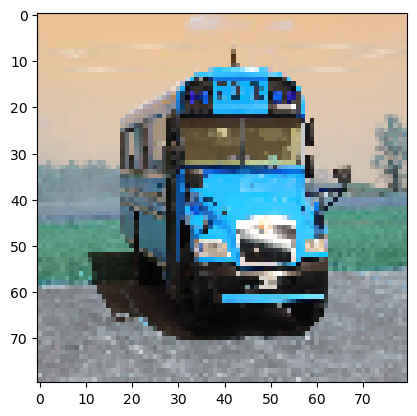

In [9]:
plt.imshow(Data[10][0])

In [10]:
len(Data)

400

In [11]:
len(Data[1][0])

80

In [12]:
Data[100][1]

1

In [13]:
import random
random.shuffle(Data)

In [14]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [15]:
len(F)

400

In [16]:
T

[0,
 0,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 3,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 3,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 3,
 2,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 3,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 2,
 0,
 3,
 2,
 2,
 3,
 2,
 3,
 0,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 1,
 0,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 0,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 0,


In [17]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

C:\Users\vidya\AppData\Local\Temp\ipykernel_5940\3722759232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
395,0,0,0,1
396,0,0,0,1
397,1,0,0,0
398,0,0,0,1


In [18]:
F=np.array(F)

In [19]:
T2=np.array(T1)

In [20]:
T2

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=int64)

In [21]:
F1=F/255.

In [22]:
F

array([[[[250, 254, 248],
         [250, 254, 248],
         [251, 252, 248],
         ...,
         [242, 241, 231],
         [242, 240, 229],
         [240, 240, 227]],

        [[250, 254, 248],
         [251, 252, 248],
         [251, 254, 248],
         ...,
         [242, 241, 227],
         [242, 240, 228],
         [241, 239, 225]],

        [[250, 254, 249],
         [249, 253, 248],
         [250, 254, 249],
         ...,
         [239, 238, 225],
         [241, 240, 226],
         [189, 194, 177]],

        ...,

        [[120, 151, 137],
         [122, 155, 141],
         [119, 155, 138],
         ...,
         [122, 143, 133],
         [116, 144, 138],
         [116, 142, 133]],

        [[119, 149, 136],
         [120, 150, 136],
         [116, 150, 135],
         ...,
         [117, 146, 140],
         [121, 146, 139],
         [113, 144, 135]],

        [[115, 146, 133],
         [118, 149, 136],
         [119, 149, 136],
         ...,
         [115, 145, 129],
        

In [23]:
F1.shape

(400, 80, 80, 3)

# VGG16 MODEL

In [25]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [26]:
vgg=VGG16(input_shape=[80,80,3],
         weights='imagenet',
         include_top=False)

In [27]:
for i in vgg.layers:
    i.trainable=False

In [28]:
x=Flatten()(vgg.output)

In [29]:
z=Dense(4,activation='softmax')(x)

In [30]:
model=Model(vgg.input,z)

In [31]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
T2

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=int64)

In [33]:
model.fit(F1,T2,epochs=3,validation_split=0.1)

Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.3266 - loss: 1.4582 - val_accuracy: 0.5250 - val_loss: 1.0599
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.6577 - loss: 0.9533 - val_accuracy: 0.6500 - val_loss: 0.9201
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.7984 - loss: 0.7175 - val_accuracy: 0.6750 - val_loss: 0.7834


# VGG 19

In [35]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Sequential

In [36]:
vgg=VGG19(input_shape=[80,80,3],
         weights='imagenet',
         include_top=False)

In [37]:
for i in vgg.layers:
    i.trainable=False

In [38]:
x=Flatten()(vgg.output)

In [39]:
z=Dense(4,activation='softmax')(x)

In [40]:
model=Model(vgg.input,z)

In [41]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
model.fit(F1,T2,epochs=3,validation_split=0.1)

Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.2986 - loss: 1.5655 - val_accuracy: 0.5000 - val_loss: 1.1687
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.5472 - loss: 1.0594 - val_accuracy: 0.6500 - val_loss: 1.0292
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.7548 - loss: 0.7833 - val_accuracy: 0.7000 - val_loss: 0.8950


In [43]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Sequential

In [44]:
vgg=ResNet50(input_shape=[80,80,3],
         weights='imagenet',
         include_top=False)

In [45]:
for i in vgg.layers:
    i.trainable=False

In [46]:
x=Flatten()(vgg.output)

In [47]:
z=Dense(4,activation='softmax')(x)

In [48]:
model=Model(vgg.input,z)

In [49]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
model.fit(F1,T2,epochs=3,validation_split=0.1)

Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2555 - loss: 1.8627 - val_accuracy: 0.4000 - val_loss: 1.3261
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5468 - loss: 1.1465 - val_accuracy: 0.2500 - val_loss: 1.4869
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4793 - loss: 1.1711 - val_accuracy: 0.4250 - val_loss: 1.3340


# AlexNet Model

In [52]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.alexnet import AlexNet
from keras.applications.alexnet import preprocess_input
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras.applications.alexnet'

In [ ]:
vgg=AlexNet(input_shape=[80,80,3],
         weights='imagenet',
         include_top=False)

In [ ]:
for i in vgg.layers:
    i.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
z=Dense(4,activation='softmax')(x)

In [ ]:
model=Model(vgg.input,z)

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(F1,T2,epochs=3,validation_split=0.1)

In [ ]:
img_path = r"C:\Users\vidya\Downloads\Vehikal classification\Dataset\motorcycle\Image_76.jpeg"
img = cv.imread(img_path,)

img_resized = cv.resize(img, (80, 80))
img_resized=img_resized.reshape(1, 80, 80, 3)

plt.imshow(img,)
plt.show()

In [ ]:
prediction = model.predict(img_resized)
prediction

In [ ]:
dis[2]

In [ ]:
p1=r"C:\Users\vidya\Downloads\Vehikal classification\Dataset"


In [ ]:
Data1=[]
for i in dis:
    A=os.path.join(p1,i) 
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(80,80))
        T=dis.index(i) 
        Data1.append([C,T]) 

In [ ]:
import random
random.shuffle(Data1)

In [ ]:
Data1[1]

In [ ]:
F1=[]
T1=[]
for i,j in Data1:
    F1.append(i)
    T1.append(j)

In [ ]:
T1

In [ ]:
F1=np.array(F1)
F1=F1/255  

In [ ]:
pred=model.predict(F1)
pred

In [ ]:
pred1=[]
for i in pred:
    pred1.append(np.argmax(i))

In [ ]:
pred1

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
confusion_matrix(T1,pred1)

In [ ]:
print(classification_report(T1,pred1))

In [ ]:
accuracy_score(T1,pred1)*100


In [ ]:
a={"models":["VGG16","VGG19","ResNet"],"Train":[0.73,0.71,0.31],"Validation":[0.72,0.75,0.15]}

In [ ]:
a=pd.DataFrame(a)
a

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(a["models"],a["Train"],color="g",width=0.3,align="center",label="Training Accu.")
plt.bar(a["models"],a["Validation"],color="r",width=0.3,align="edge",label="Validation Accu.")
#plt.bar(a["models"],a["Validation"],color="black",width=0.3,align="edge",label="Validation Accu.")
plt.xlabel("Transfer Learning Models------>")
plt.ylabel("Accuracy----->")
plt.title("TL VGG16 , VGG19 , ResNet Model Accu. Compaire")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Conclusion